In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display first rows and header
pd.read_csv('/content/cneos_sentry_summary_data.csv').head(n=10)

,Object Designation,Year Range,Potential Impacts,Impact Probability (cumulative),Vinfinity (km/s),H (mag),Estimated Diameter (km),Palermo Scale (cum.),Palermo Scale (max.),Torino Scale (max.),Unnamed: 10
0,101955 Bennu (1999 RQ36),2178-2290,157,0.000570,5.99,20.6,0.490,-1.41,-1.59,NaN,a0101955
1,29075 (1950 DA),2880-2880,1,0.000029,14.10,17.9,1.300,-2.05,-2.05,NaN,a0029075
2,(2000 SG344),2069-2122,300,0.002700,1.36,24.8,0.037,-2.79,-3.14,0.0,bK00SY4G
3,(2010 RF12),2095-2122,70,0.100000,5.10,28.4,0.007,-2.98,-2.98,0.0,bK10R12F
4,(2021 EU),2024-2093,8,0.000077,21.38,25.4,0.028,-3.03,-3.07,0.0,bK21E00U
5,(2008 JL3),2027-2122,44,0.000170,8.42,25.3,0.029,-3.08,-3.08,0.0,bK08J03L
6,(2005 ED224),2023-2064,3,0.000003,24.96,24.0,0.054,-3.17,-3.18,0.0,bK05EM4D
7,(2022 PX1),2040-2040,1,0.000003,35.11,22.3,0.120,-3.20,-3.20,0.0,bK22P01X
8,(2005 QK76),2030-2059,6,0.000071,19.67,25.2,0.031,-3.31,-3.42,0.0,bK05Q76K
9,(2021 GX9),2032-2052,2,0.000082,16.79,25.3,0.029,-3.41,-3.41,0.0,bK21G09X


In [ ]:
# import and prepare dataframe
def load_dataset():
    # 1. load data from CSV file
    dataframe = pd.read_csv('cneos_sentry_summary_data.csv', header=None, skiprows=1)
    
    # 2. drop last, unnamed column
    dataframe = dataframe.iloc[:, :-1]
    
    # 3. rename header
    col_list = ['Object Name', 'Year Range', 'Potential Impacts',
                'Impact Probability (cum.)', 'Asteroid Velocity (km/s)',
                'Asteroid Magnitude (mag)', 'Estimated Diameter (km)',
                'Palermo Scale (cum.)', 'Palermo Scale (max.)', 'Torino Scale (max.)']
    dataframe.columns = col_list
    
    # 4. split column into two
    dataframe[['Start Year', 'End Year']] = dataframe['Year Range'].str.split('-', expand=True)
    
    # 5. drop unnecessary column by name
    dataframe = dataframe.drop('Year Range', axis=1)
    
    # 6. drop duplicates (if any)
    dataframe = dataframe.drop_duplicates()
    
    return dataframe

df = load_dataset()

# show results
df.head()

,Object Name,Potential Impacts,Impact Probability (cum.),Asteroid Velocity (km/s),Asteroid Magnitude (mag),Estimated Diameter (km),Palermo Scale (cum.),Palermo Scale (max.),Torino Scale (max.),Start Year,End Year
0,101955 Bennu (1999 RQ36),157,0.000570,5.99,20.6,0.490,-1.41,-1.59,NaN,2178,2290
1,29075 (1950 DA),1,0.000029,14.10,17.9,1.300,-2.05,-2.05,NaN,2880,2880
2,(2000 SG344),300,0.002700,1.36,24.8,0.037,-2.79,-3.14,0.0,2069,2122
3,(2010 RF12),70,0.100000,5.10,28.4,0.007,-2.98,-2.98,0.0,2095,2122
4,(2021 EU),8,0.000077,21.38,25.4,0.028,-3.03,-3.07,0.0,2024,2093


In [ ]:
# display data types and null values in each column
def dataframe_summary():
    
    # initialize lists
    var_list = df.columns.to_list()
    dtype_list = []
    null_list = []
    
    # loop through columns
    for col in df.columns:
        dtype_list.append(df[col].dtype)
        null_list.append(df[col].isnull().sum())
    
    # stack lists into dictionary
    dict = {'Variable': var_list, 'Data type': dtype_list, 'Null values': null_list}
    
    return pd.DataFrame(dict).style.hide_index()

dataframe_summary()

Variable,Data type,Null values
Object Name,object,0
Potential Impacts,int64,0
Impact Probability (cum.),float64,0
Asteroid Velocity (km/s),float64,0
Asteroid Magnitude (mag),float64,0
Estimated Diameter (km),float64,0
Palermo Scale (cum.),float64,0
Palermo Scale (max.),float64,0
Torino Scale (max.),float64,2
Start Year,object,0


In [ ]:
# search for values other than 0.0 for Torino Scale
df.query('`Torino Scale (max.)` != 0.0')

,Object Name,Potential Impacts,Impact Probability (cum.),Asteroid Velocity (km/s),Asteroid Magnitude (mag),Estimated Diameter (km),Palermo Scale (cum.),Palermo Scale (max.),Torino Scale (max.),Start Year,End Year
0,101955 Bennu (1999 RQ36),157,0.000570,5.99,20.6,0.49,-1.41,-1.59,NaN,2178,2290
1,29075 (1950 DA),1,0.000029,14.10,17.9,1.30,-2.05,-2.05,NaN,2880,2880


In [ ]:
# check years
df.query('`Start Year` > `End Year`')

,Object Name,Potential Impacts,Impact Probability (cum.),Asteroid Velocity (km/s),Asteroid Magnitude (mag),Estimated Diameter (km),Palermo Scale (cum.),Palermo Scale (max.),Torino Scale (max.),Start Year,End Year


In [ ]:
# correct entites
# 1. filter out rows with filled cells
df = df[pd.notnull(df['Asteroid Velocity (km/s)'])]
    
# 2. drop Torino scale column
df = df.drop('Torino Scale (max.)', axis=1)
    
# 3. convert from objects to integers
df = df.astype({'Start Year': int, 'End Year': int})

# display number of rows
print('Number of Entites: {}'.format(df.shape[0]))

Number of Entites: 24


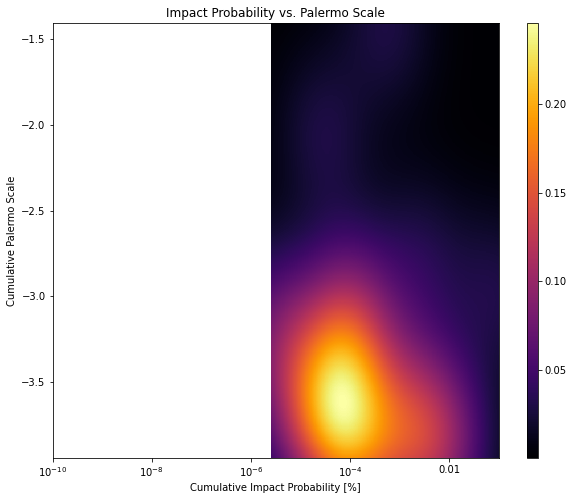

In [ ]:
# plot Palermo scale vs. impact probability
def density_plot():
    from scipy.stats import gaussian_kde
    
    plt.figure(figsize=(10, 8))
    x = np.log10(df['Impact Probability (cum.)'])
    y = df['Palermo Scale (cum.)']
    
    # Gaussian KDE on a regular grid
    n_bins = 400
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():n_bins*1j, y.min():y.max():n_bins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), edgecolors='none', shading='auto', cmap='inferno')
    plt.xticks([-10, -8, -6, -4, -2], ['10$^{-10}$', '10$^{-8}$', '10$^{-6}$','10$^{-4}$', '0.01'])
    plt.title('Impact Probability vs. Palermo Scale')
    plt.xlabel('Cumulative Impact Probability [%]')
    plt.ylabel('Cumulative Palermo Scale')
    plt.colorbar(aspect=40)
    plt.show()

density_plot()

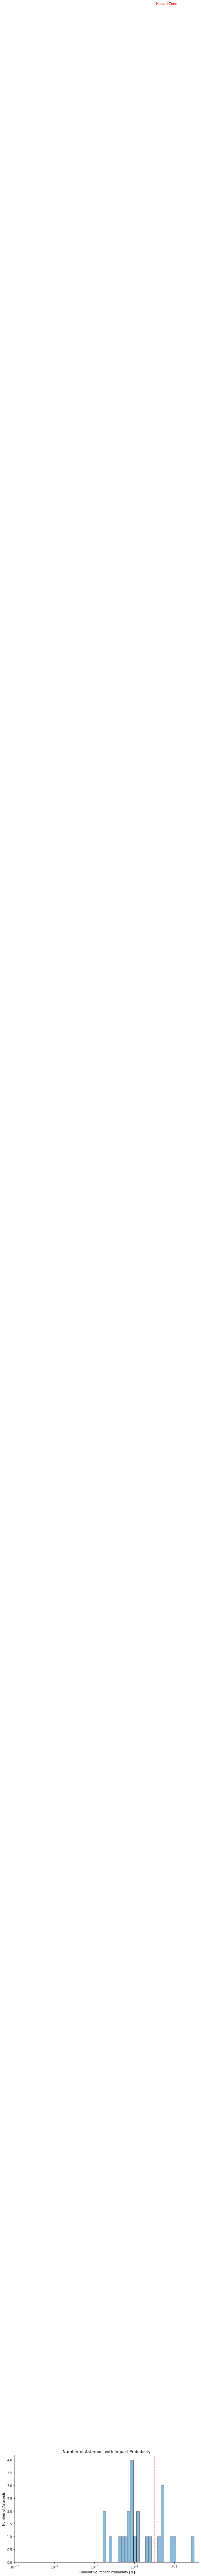

Number of Hazardous Objects: 7


In [ ]:
# plot quantity for each impact probability
def plot_histogram():
    
    plt.figure(figsize=(10, 6))
    x = np.log10(df['Impact Probability (cum.)'])
    plt.hist(x=x, bins=30, edgecolor='black', alpha=0.5)
    
    plt.axvline(x=-3, linestyle='--', color='red')
    plt.text(x=-2.9, y=100, s='Hazard Zone', color='red') 
    plt.xticks([-10, -8, -6, -4, -2], ['10$^{-10}$', '10$^{-8}$', '10$^{-6}$','10$^{-4}$', '0.01'])
    plt.title('Number of Asteroids with Impact Probability')
    plt.xlabel('Cumulative Impact Probability [%]')
    plt.ylabel('Number of Asteroids')
    plt.show()
    
plot_histogram()

# display number of dangerous objects
print('Number of Hazardous Objects:', len(df.query('`Impact Probability (cum.)` > 10**(-3)')))

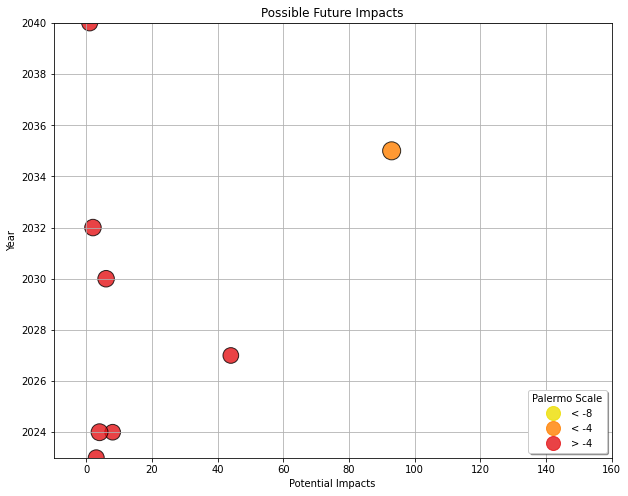

In [ ]:
#plot potential impacts in the future years
def plot_possible_impacts():
    
    # coloring markers by Palermo scale
    def marker_color(impact):
        if impact < -8:
            return '#EDDE00' # yellow
        elif impact < -4:
            return '#FF8000' # orange
        else:
            return '#E41316' # red
        
    # scaling markers - Palermo scale x -80
    def marker_size(scale):
        return (scale) * -80
    
    # create new lists for plotting
    color_list = [marker_color(impact) for impact in df['Palermo Scale (max.)']]
    scale_list = [marker_size(scale) for scale in df['Palermo Scale (max.)']]

    plt.figure(figsize=(10, 8))
    plt.xlim(-10, 160)
    plt.ylim(2023, 2040)
    plt.scatter(x=df['Potential Impacts'], y=df['Start Year'], s=scale_list, c=color_list, alpha=0.8,
                marker='o', edgecolors='black')
    plt.title('Possible Future Impacts')
    plt.xlabel('Potential Impacts')
    plt.ylabel('Year')
    plt.grid(True)
    
    # create legend
    from matplotlib.lines import Line2D
    
    colors = ['#EDDE00', '#FF8000', '#E41316']
    labels = ['< -8', '< -4', '> -4']

    legend_elements = []
    for i, j in zip(colors, labels):
        legend_elements.append(Line2D([0],[0], color=i, marker='o', linestyle='None', markersize=14, alpha=0.8, label=j))

    plt.legend(handles=legend_elements, loc='lower right', title='Palermo Scale', ncol=1, shadow=True)
    plt.show() 

plot_possible_impacts()

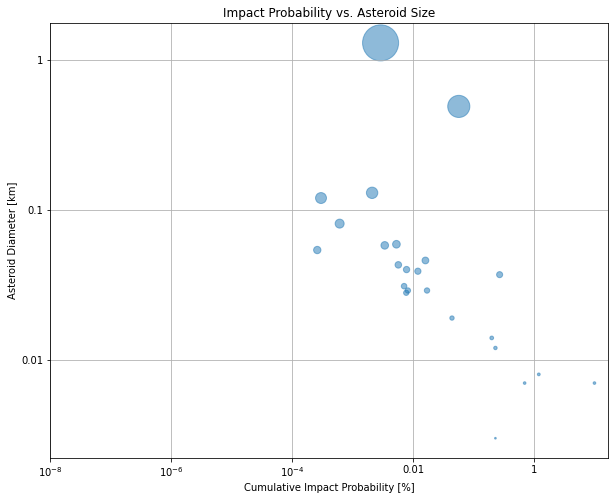

In [ ]:
# scatter plot size vs. impact probability
def scatter_plot_size():
    plt.figure(figsize=(10, 8))
    x = np.log10(df['Impact Probability (cum.)']*100)
    y = np.log10(df['Estimated Diameter (km)'])
    d = df['Estimated Diameter (km)']
    
    plt.scatter(x, y, s=d*1000, alpha=0.5)
    plt.xticks([-8, -6, -4, -2, 0], ['10$^{-8}$', '10$^{-6}$','10$^{-4}$', '0.01', '1'])
    plt.yticks([-2, -1, 0], ['0.01', '0.1', '1'])
    plt.title('Impact Probability vs. Asteroid Size')
    plt.xlabel('Cumulative Impact Probability [%]')
    plt.ylabel('Asteroid Diameter [km]')
    plt.grid()
    plt.show()
    
scatter_plot_size()

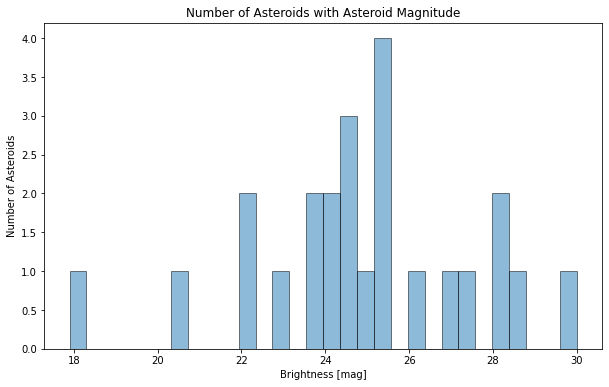

In [ ]:
# plot quantity for each asteroid magnitude
def magnitude_histogram():
    
    plt.figure(figsize=(10, 6))
    x = df['Asteroid Magnitude (mag)']
    plt.hist(x=x, bins=30, edgecolor='black', alpha=0.5)
    plt.title('Number of Asteroids with Asteroid Magnitude')
    plt.xlabel('Brightness [mag]')
    plt.ylabel('Number of Asteroids')
    plt.show()
    
magnitude_histogram()

In [ ]:
#Importing the dependecies 
#!pip install basemap 
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 18})

In [ ]:
# Loading the file
file = "meteorite-landings.csv"

# Reading the meteor csv data file 
meteor = pd.read_csv(file)


# Displaying the data table for preview
meteor.head(5)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [ ]:
meteor = meteor.rename(columns ={"recclass": "type", "fall": "discovery", "nametype": "appearance", "reclat": "lat", "reclong": "long", "GeoLocation": "coordinates"})

meteor.head()

,name,id,appearance,type,mass,discovery,year,lat,long,coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [ ]:
#Dropping some unecessary columns 
meteor = meteor.drop(columns=["id", "coordinates"])
meteor.head()

,name,appearance,type,mass,discovery,year,lat,long
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000


In [ ]:
meteor_count = meteor["year"].value_counts()
meteor_count.head()

2003.0    3323
1979.0    3046
1998.0    2697
2006.0    2456
1988.0    2296
Name: year, dtype: int64

In [ ]:
# Remove the rows with missing data
clean_meteor_df = meteor.dropna(how="any")
clean_meteor_df.count()

name          38116
appearance    38116
type          38116
mass          38116
discovery     38116
year          38116
lat           38116
long          38116
dtype: int64

In [ ]:
clean_meteor_df.head()

,name,appearance,type,mass,discovery,year,lat,long
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000


In [ ]:
n_types = meteor['type'].unique().size
print(f'There are {n_types} unique meteor types.')

There are 466 unique meteor types.


In [ ]:
# Using GroupBy in order to separate the data into fields according to "state" values# Using  
grouped_meteor_df = meteor.groupby(['year'])

# In order to be visualized, a data function must be used...
#grouped_meteor_df.head(5)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log10



(0.1, 100000000.0)

(1700.0, 2020.0)

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Mass (grams)')

Text(0.5, 1.0, 'Meteorite Mass (grams) vs. Year')

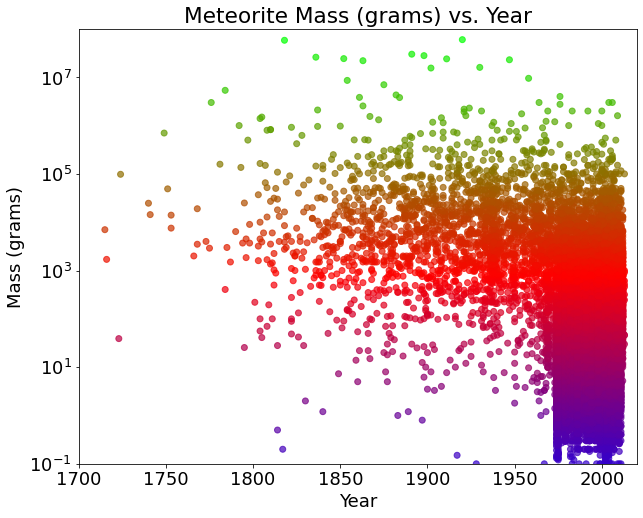

In [ ]:
x = meteor['year']
y = meteor['mass']
fig = plt.figure(figsize=(10,8))

plt.scatter(x, y, c=np.log10(y), cmap=plt.cm.brg, alpha=0.7)
plt.ylim([0.1,1e8])
plt.xlim([1700,2020])
plt.yscale('log')

plt.xlabel("Year")
plt.ylabel("Mass (grams)")
plt.title("Meteorite Mass (grams) vs. Year")

Text(0.5, 1.0, 'Full Disk Orthographic Projection')

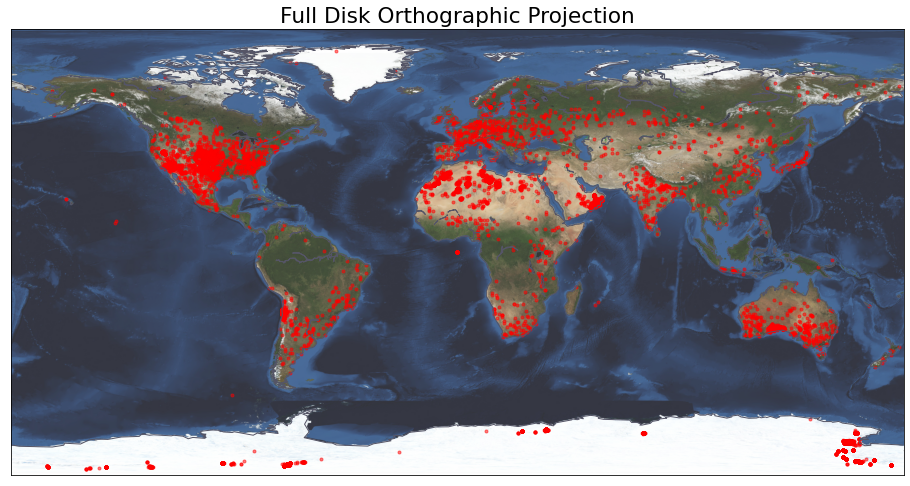

In [ ]:
# lon_0, lat_0 are the center point of the projection.
# resolution = 'l' means use low resolution coastlines.
fig = plt.figure(figsize=(16,11))
# m = Basemap(projection='ortho',lon_0=-105,lat_0=40,resolution='l')
m = Basemap()
m.bluemarble(alpha=0.8)
m.drawcoastlines(color="#555566", linewidth=1)
plt.scatter(meteor['long'], meteor['lat'], c='red', marker='.', alpha=0.5)
# m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
# #draw parallels and meridians.
# m.drawparallels(np.arange(-90.,120.,30.))
# m.drawmeridians(np.arange(0.,420.,60.))
# m.drawmapboundary(fill_color='aqua')
plt.title("Full Disk Orthographic Projection")

Text(0.5, 1.0, 'Meteor Type Martian (nakhlite)')

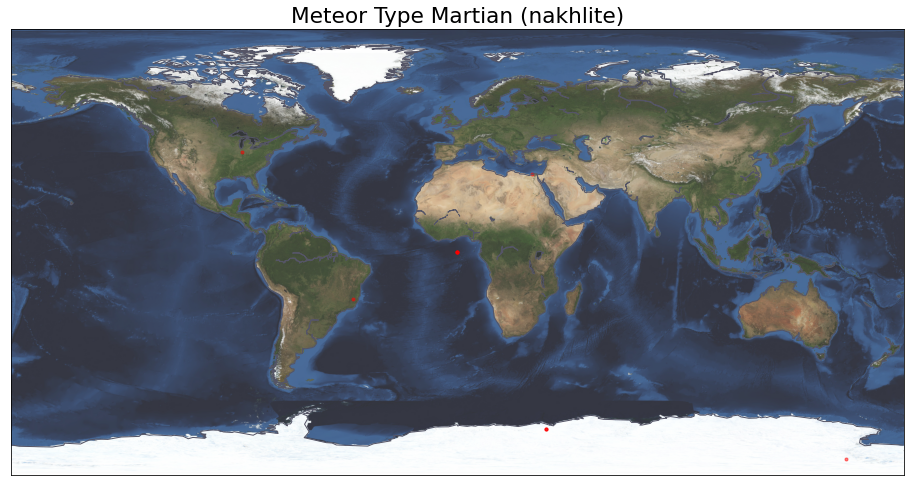

In [ ]:
# Look at one specific type
meteor_type = "Martian (nakhlite)"
L5 = meteor.loc[meteor['type'] == meteor_type]
# lon_0, lat_0 are the center point of the projection.
# resolution = 'l' means use low resolution coastlines.
fig = plt.figure(figsize=(16,11))
# m = Basemap(projection='ortho',lon_0=-105,lat_0=40,resolution='l')
m = Basemap()
m.bluemarble(alpha=0.8)
m.drawcoastlines(color="#555566", linewidth=1)
plt.scatter(L5['long'], L5['lat'], c='red', marker='.', alpha=0.5)
# m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
# #draw parallels and meridians.
# m.drawparallels(np.arange(-90.,120.,30.))
# m.drawmeridians(np.arange(0.,420.,60.))
# m.drawmapboundary(fill_color='aqua')
plt.title(f"Meteor Type {meteor_type}")